Q1.
Ans: 
    Total Multiplications: nmk
    Explanation: Final matrix is of dimention nxm with nm entries. Each entry is calculated by k multiplications.
    
    Total additions: nm(k-1)
    Explanation: For each entry it requires k-1 additions, so total nm(k-1) additions.

In [4]:
# Q2
import numpy as np
import time

def matrix_multiplication_lists(matrix1, matrix2):
    # Check if the matrices can be multiplied
    if len(matrix1[0]) != len(matrix2):
        print("Matrices cannot be multiplied because of unacceptable shapes!!")
        return
    
    # Create a result matrix with dimensions n x m
    ans = [[0 for _ in range(len(matrix2[0]))] for _ in range(len(matrix1))]
    
    # Perform matrix multiplication
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                ans[i][j] += matrix1[i][k] * matrix2[k][j]
    
    return ans
    

def matrix_multiplication_numpy(matrix1, matrix2):
    return np.dot(matrix1, matrix2)


matrix1 = [list(range(0,100))]*10
matrix2 = [list(range(0,100))]*100

# Time the list of lists implementation
start = time.time()
result_lists = matrix_multiplication_lists(matrix1, matrix2)
end = time.time()
time_lists = end - start
print(f"Time using lists: {time_lists:.6f} seconds")

matrix1 = np.array(matrix1)
matrix2 = np.array(matrix2)

# Time the NumPy implementation
start = time.time()
result_numpy = matrix_multiplication_numpy(matrix1, matrix2)
end = time.time()
time_numpy = end - start
print(f"Time using NumPy: {time_numpy:.6f} seconds")


Resultant matrix
Time using lists: 0.013342 seconds
Resultant matrix
Time using NumPy: 0.000219 seconds


When we take input matrices of small dimensions than timings of list of lists and numpy are compareable but when input matrices are of bigger dimension than numpy is much faster than lists, so numpy is faster than list.

Reason: numpy stores the data in homogeneous data-types that are stored in contiguous memory locations whereas lists stores data in heterogeneous data types stored in non-contiguous memory locations. Also, the NumPy package breaks down a task into multiple fragments and then processes all the fragments parallelly. Thus in case of lists it takes more time to access and multiply the huge matrices.

In [75]:
# Q3

import numpy as np
import timeit

# Time Complexity: O(n**2)
def median(arr):

    length = int(len(arr)/2)

    latestHighest = float('inf')

    if(len(arr)%2 == 0):
        median = 0
        for i in range(length+1):
            temp_max = -float('inf') - 1
            for j in arr:
                if(j >= temp_max and j < latestHighest):
                    temp_max = j
            latestHighest = temp_max
            if(i == length - 1 or i == length):
                median = median + latestHighest

        median = median/2
        return median

    else:
        for i in range(length+1):
            temp_max = -float('inf') - 1
            for j in arr:
                if(j >= temp_max and j < latestHighest):
                    temp_max = j
            latestHighest = temp_max
        return latestHighest




def median_opt_helper(arr, k):

    pivot = arr[len(arr)//2]

    low = [x for x in arr if x < pivot]
    high = [x for x in arr if x > pivot]
    pivots = [x for x in arr if x == pivot]

    if k < len(low):
        return median_opt_helper(low, k)
    elif k < len(low) + len(pivots):
        return pivots[0]
    else:
        return median_opt_helper(high, k - len(low) - len(pivots))


# Time complexity: O(n) [Average case cenerio]
def median_opt(arr):

    n = len(arr)
    if n % 2 == 1:
        return median_opt_helper(arr, n // 2)
    else:
        return (median_opt_helper(arr, n // 2 - 1) + median_opt_helper(arr, n // 2)) / 2

def median_numpy(arr):
    return np.median(arr)


arr = np.random.uniform(1,100, size=(1,200))[0]
%timeit -r10 -n20 median(arr)
%timeit -r10 -n20 median_opt(arr)
%timeit -r10 -n20 median_numpy(arr)
    

# Time: median_numpy < median_opt < median for in general big inputs.
    


1.59 ms ± 134 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
165 µs ± 33.1 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
23.2 µs ± 7.25 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)


Q4
Ans
   df_dx(x**2*y + y**3*sin(x)) = 2*x*y + y**3*cos(x)
   df_dy(x**2*y + y**3*sin(x)) = x**2 + 3*y**2*sin(x)

In [76]:
#5
import jax.numpy as jnp
from jax import grad

def f(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

def df_dx(x, y):
  return 2*x*y + y**3 * jnp.cos(x)

def df_dy(x, y):
  return x**2 + 3*y**2 * jnp.sin(x)

# Let's check the gradients at x = 3, y = 4
x, y = 3.0, 4.0

print(df_dx(x, y), grad(f, 0)(x, y))
print(df_dy(x, y), grad(f, 1)(x, y))

# Let's check the gradients at x = 0.5, y = -1.5
x, y = 0.5, -1.5

print(df_dx(x, y), grad(f, 0)(x, y))
print(df_dy(x, y), grad(f, 1)(x, y))

AttributeError: _src

In [51]:
#6
import sympy

x, y = sympy.symbols('x y')
f = x**2 * y + y**3 * sympy.sin(x)

df_dx = sympy.diff(f, x)
df_dy = sympy.diff(f, y)

print(df_dx)  # Output: 2*x*y + y**3*cos(x)
print(df_dy)  # Output: x**2 + 3*y**2*sin(x)

ModuleNotFoundError: No module named 'sympy'

In [54]:
#Q7

Student = dict()
Student["2022"] = {}
Student["2022"]["Branch1"] = {}
Student["2022"]["Branch1"][1] = {}                        
Student["2022"]["Branch1"][1]["Roll_Number"] = 1
Student["2022"]["Branch1"][1]["Name"] = "Abhay"
Student["2022"]["Branch1"][1]["Marks"] = {}
Student["2022"]["Branch1"][1]["Marks"]["Maths"] = 99
Student["2022"]["Branch1"][1]["Marks"]["English"] = 78
                           
Student["2022"]["Branch1"][2] = {}                        
Student["2022"]["Branch1"][2]["Roll_Number"] = 2
Student["2022"]["Branch1"][2]["Name"] = "Barley"
Student["2022"]["Branch1"][2]["Marks"] = {}
Student["2022"]["Branch1"][2]["Marks"]["Maths"] = 89
Student["2022"]["Branch1"][2]["Marks"]["English"] = 98
Student["2022"]["Branch2"] = {}
Student["2022"]["Branch2"][1] = {}                        
Student["2022"]["Branch2"][1]["Roll_Number"] = 1
Student["2022"]["Branch2"][1]["Name"] = "China"
Student["2022"]["Branch2"][1]["Marks"] = {}
Student["2022"]["Branch2"][1]["Marks"]["Maths"] = 79
Student["2022"]["Branch2"][1]["Marks"]["English"] = 94

Student["2022"]["Branch2"][2] = {}                        
Student["2022"]["Branch2"][2]["Roll_Number"] = 2
Student["2022"]["Branch2"][2]["Name"] = "Diana"
Student["2022"]["Branch2"][2]["Marks"] = {}
Student["2022"]["Branch2"][2]["Marks"]["Maths"] = 95
Student["2022"]["Branch2"][2]["Marks"]["English"] = 91
Student["2023"] = {}
Student["2023"]["Branch1"] = {}
Student["2023"]["Branch1"][1] = {}                        
Student["2023"]["Branch1"][1]["Roll_Number"] = 1
Student["2023"]["Branch1"][1]["Name"] = "Aisha"
Student["2023"]["Branch1"][1]["Marks"] = {}
Student["2023"]["Branch1"][1]["Marks"]["Maths"] = 97
Student["2023"]["Branch1"][1]["Marks"]["English"] = 88

Student["2023"]["Branch1"][2] = {}                        
Student["2023"]["Branch1"][2]["Roll_Number"] = 2
Student["2023"]["Branch1"][2]["Name"] = "Falgu"
Student["2023"]["Branch1"][2]["Marks"] = {}
Student["2023"]["Branch1"][2]["Marks"]["Maths"] = 96
Student["2023"]["Branch1"][2]["Marks"]["English"] = 92
Student["2023"]["Branch2"] = {}
Student["2023"]["Branch2"][1] = {}                        
Student["2023"]["Branch2"][1]["Roll_Number"] = 1
Student["2023"]["Branch2"][1]["Name"] = "Emelia"
Student["2023"]["Branch2"][1]["Marks"] = {}
Student["2023"]["Branch2"][1]["Marks"]["Maths"] = 87
Student["2023"]["Branch2"][1]["Marks"]["English"] = 85

Student["2023"]["Branch2"][2] = {}                        
Student["2023"]["Branch2"][2]["Roll_Number"] = 2
Student["2023"]["Branch2"][2]["Name"] = "Keshav"
Student["2023"]["Branch2"][2]["Marks"] = {}
Student["2023"]["Branch2"][2]["Marks"]["Maths"] = 100
Student["2023"]["Branch2"][2]["Marks"]["English"] = 99

print(Student)

{'2022': {'Branch1': {1: {'Roll_Number': 1, 'Name': 'Abhay', 'Marks': {'Maths': 99, 'English': 78}}, 2: {'Roll_Number': 2, 'Name': 'Barley', 'Marks': {'Maths': 89, 'English': 98}}}, 'Branch2': {1: {'Roll_Number': 1, 'Name': 'China', 'Marks': {'Maths': 79, 'English': 94}}, 2: {'Roll_Number': 2, 'Name': 'Diana', 'Marks': {'Maths': 95, 'English': 91}}}}, '2023': {'Branch1': {1: {'Roll_Number': 1, 'Name': 'Aisha', 'Marks': {'Maths': 97, 'English': 88}}, 2: {'Roll_Number': 2, 'Name': 'Falgu', 'Marks': {'Maths': 96, 'English': 92}}}, 'Branch2': {1: {'Roll_Number': 1, 'Name': 'Emelia', 'Marks': {'Maths': 87, 'English': 85}}, 2: {'Roll_Number': 2, 'Name': 'Keshav', 'Marks': {'Maths': 100, 'English': 99}}}}}


In [ ]:
# Q8

class Student:
  def _init_(self, name, roll_number, marks):
    self.name = name
    self.roll_number = roll_number
    self.marks = marks

class Branch:
  def _init_(self, name, students):
    self.name = name
    self.students = students

class Year:
  def _init_(self, year, branches):
    self.year = year
    self.branches = branches
    
branches20 = [Branch("CSE", )]    
year20 = Year(2020, branches20)
    
database = [
  Year(2020, [
    Branch("Computer Science", [
      Student("Prakram", 1, [96, 90, 91]),
      Student("Tejas", 2, [98, 99, 90])
    ]),
    Branch("Mechanical Engineering", [
      Student("Dhakad", 3, [65, 88, 85]),
      Student("Sachin", 4, [91, 94, 95])
    ])
  ]),
  Year(2021, [
    Branch("Computer Science", [
      Student("Tomar", 5, [88, 96, 100]),
      Student("Pratik", 6, [70, 83, 90])
    ]),
    Branch("Mechanical Engineering", [
      Student("Abhay", 7, [95, 65, 92]),
      Student("Ujjwal", 8, [89, 68, 87])
    ])
  ])
]

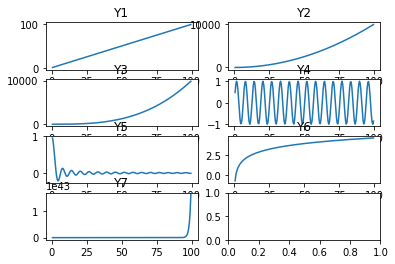

In [37]:
#Q9
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0.5, 100.0, 0.5)

y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

fig, ax = plt.subplots(4,2)

ax[0,0].plot(x, y1, label='y1')
ax[0,0].set_title("Y1")
ax[0,1].plot(x, y2, label='y2')
ax[0,1].set_title("Y2")
ax[1,0].plot(x, y3, label='y3')
ax[1,0].set_title("Y3")
ax[1,1].plot(x, y4, label='y4')
ax[1,1].set_title("Y4")
ax[2,0].plot(x, y5, label='y5')
ax[2,0].set_title("Y5")
ax[2,1].plot(x, y6, label='y6')
ax[2,1].set_title("Y6")
ax[3,0].plot(x, y7, label='y7')
ax[3,0].set_title("Y7")

plt.show()

In [39]:
# Q10, Q11
import numpy as np
import pandas as pd

# Generate a matrix of size 20x5 containing random numbers drawn uniformly from the range of 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a dataframe out of the matrix and name the columns "a", "b", "c", "d", "e"
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])
print(df)

# Find the column with the highest standard deviation
column_stds = df.std()
highest_std_column = column_stds.idxmax()
print(f"Column with highest standard deviation: {highest_std_column}")

# Find the row with the lowest mean
row_means = df.mean(axis=1)
lowest_mean_row = row_means.idxmin()
print(f"Row with lowest mean: {lowest_mean_row}")

# Add a new column "f" which is the sum of the columns "a", "b", "c", "d", "e"
df["f"] = df.sum(axis=1)

# Create a column "g" which is "LT8" if the value in the column "f" is less than 8, and "GT8" otherwise
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
print(df)

# Find the number of rows in the dataframe where the value in the column "g" is "LT8"
num_lt8 = len(df[df["g"] == "LT8"])
print(f"Number of rows with 'g' value 'LT8': {num_lt8}")

# Find the standard deviation of the column "f" for the rows where the value in the column "g" is "LT8" and "GT8" respectively
lt8_std = df[df["g"] == "LT8"]["f"].std()
gt8_std = df[df["g"] == "GT8"]["f"].std()
print(f"Standard deviation of 'f' for rows with 'g' value 'LT8': {lt8_std:.2f}")
print(f"Standard deviation of 'f' for rows with 'g' value 'GT8': {gt8_std:.2f}")


           a         b         c         d         e
0   1.351360  1.680057  1.755740  1.088343  1.945527
1   1.577064  1.801155  1.733267  1.747597  1.608373
2   1.918033  1.538353  1.878711  1.782112  1.866218
3   1.560707  1.236355  1.131489  1.002946  1.785633
4   1.061708  1.417583  1.866277  1.169834  1.873604
5   1.683376  1.989185  1.467957  1.055012  1.885834
6   1.439227  1.632011  1.742417  1.810978  1.529119
7   1.685065  1.167412  1.426647  1.535816  1.787761
8   1.100573  1.509864  1.596127  1.300131  1.082440
9   1.350104  1.549638  1.684082  1.175453  1.451436
10  1.833277  1.322813  1.948894  1.332207  1.782424
11  1.322991  1.022040  1.882426  1.300125  1.601251
12  1.802539  1.095177  1.434417  1.021532  1.070247
13  1.677029  1.090040  1.280930  1.863526  1.694975
14  1.699267  1.855087  1.128516  1.297864  1.164976
15  1.822454  1.949860  1.754986  1.895499  1.540407
16  1.216166  1.542407  1.432543  1.016809  1.536791
17  1.973523  1.165700  1.982959  1.993491  1.

In [49]:
# Q12
import numpy as np

a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(f"Array 'a' has shape {a.shape}")

b = np.array([10, 20, 30, 40])
print(f"Array 'b' has shape {b.shape}")

c = a + b
print(f"Array 'c' has shape {c.shape}")
print(c)

# Numpy uses broadcasting to perform arithmatic operations on arrays with different shapes. If two arrays are
# compatible for broadcasting or two arrays are compatible for performing arithmatic operations like the example 
# above where b can be added into a's first row, numpy will broadcast one of the array to match the size of other
# array. Here b is resized into shape of (3,4) so that it can be added into a elementwise.

Array 'a' has shape (3, 4)
Array 'b' has shape (4,)
Array 'c' has shape (3, 4)
[[11 22 33 44]
 [15 26 37 48]
 [19 30 41 52]]


In [47]:
#Q13
import numpy as np

def argmin(arr):
    min = float('inf')
    idx = 0
    for i in range(len(arr)):
        if(arr[i]<min):
            min = arr[i]
            idx = i
    return idx
 
arr = np.array([8,5,9,7,4,6])
print(argmin(arr))
print(np.argmin(arr))


4
4
